# Decision Trees

## **Descriptions**
The goal of a decision tree is to create a model predictions of the value target variable through the infromation provided in a data set. These types of trees can be looked as a piecewise constant approximation.


![Description](DecisionTree.png)

## Classification and Regressin trees(CART)

**Advantages of CART**
- Helps understand, interpret and visualize
- Perform variable screening or feature selection
- Allows inputs of both numerical and categorical data
- Not alot of effort needed in data preparation
- Non-linear relations do not affect decision trees performance

**Disadvantages of CART**
- Decision trees can create complex models that do not help generalize data (overfitting).
- Can be unstable because of variations in the data
- This algorithm cannot guarantee optimal decision trees


## Packages used
- matplotlib.pyplot
- numpy
- pandas
- plotly
- seaborn
- sklearn
- mlxtend

In [28]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import plot_tree
from sklearn.tree import export_text
from sklearn import metrics



In [29]:
df = pd.read_csv("MoviesData.csv")

## Create a quick graph to help us visualize the data 

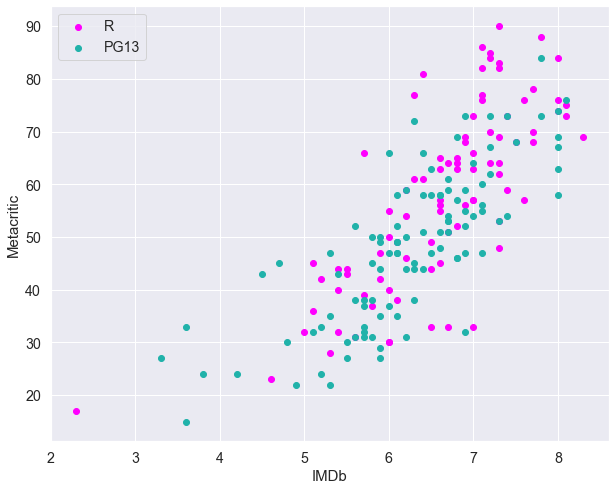

In [30]:
X = df[['IMDb','Metacritic']].to_numpy()
# Define labeling function
def make_labels(y):
    if y == "R":
        return 0
    else:
        return 1

y = df["Rating"].map(make_labels).to_numpy()

# Plot the data
age = ["R", "PG13"]
colors = ["magenta", "lightseagreen"]

fig, ax = plt.subplots(figsize = (10, 8))
for species, color in zip(age, colors):
    temp_df = df[df.Rating == species]
    ax.scatter(temp_df.IMDb,
               temp_df.Metacritic,
               c = color,
               label = species, 
               )

ax.set_xlabel("IMDb", fontsize = 15)
ax.set_ylabel("Metacritic", fontsize = 15)
ax.legend()
plt.show()

## Split data into training and testing subsets

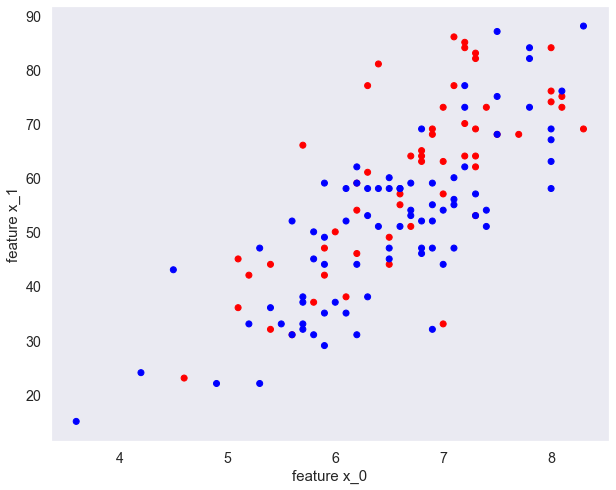

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

## Use training and test subsets to train model

In [32]:
decision_tree = DecisionTreeClassifier(max_depth=15, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=42)

## Visualize training model

|--- x_1 <= 60.50
|   |--- x_1 <= 57.50
|   |   |--- x_0 <= 6.75
|   |   |   |--- x_1 <= 54.50
|   |   |   |   |--- x_1 <= 35.50
|   |   |   |   |   |--- x_0 <= 5.65
|   |   |   |   |   |   |--- x_1 <= 22.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- x_1 >  22.50
|   |   |   |   |   |   |   |--- x_1 <= 32.50
|   |   |   |   |   |   |   |   |--- x_0 <= 4.40
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- x_0 >  4.40
|   |   |   |   |   |   |   |   |   |--- x_0 <= 5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- x_0 >  5.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- x_1 >  32.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- x_0 >  5.65
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- x_1 >  35.50
|   |   |   |   |   |--- x_0 <= 5.25
|   |   |   |   |   |   |--- x_0 <= 4.80
|   |   |   |   |   |

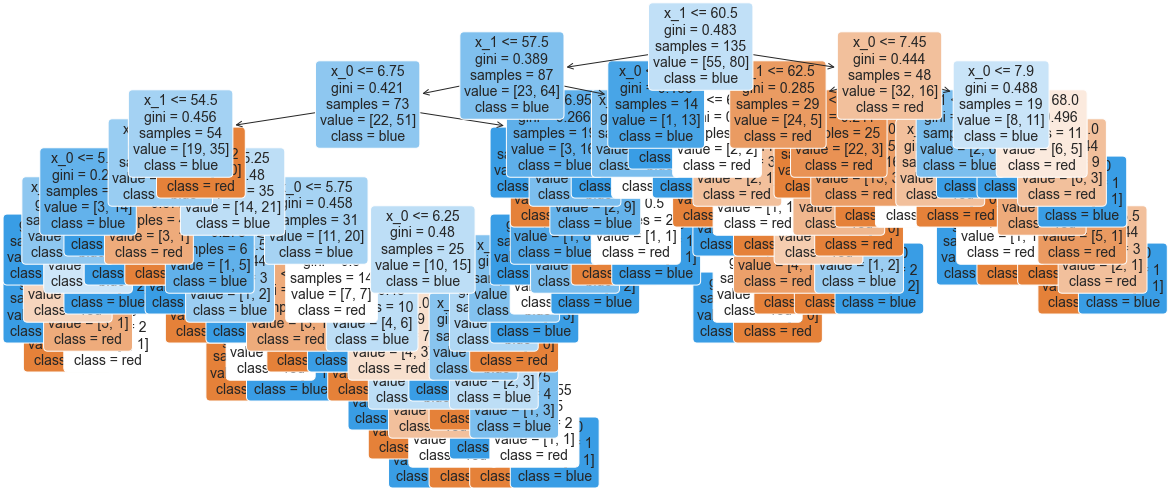

In [33]:
tree_rules = export_text(decision_tree,
                         feature_names = ["x_0", "x_1"])
print(tree_rules, "\n")


plt.figure(figsize=(20, 8))
a = plot_tree(decision_tree,
                   feature_names = ["x_0", "x_1"],
                   class_names = ["red", "blue"],
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

## Evaluate models performance

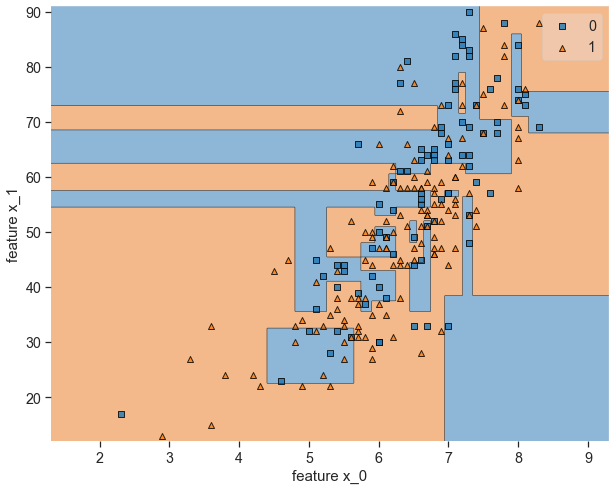

In [34]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

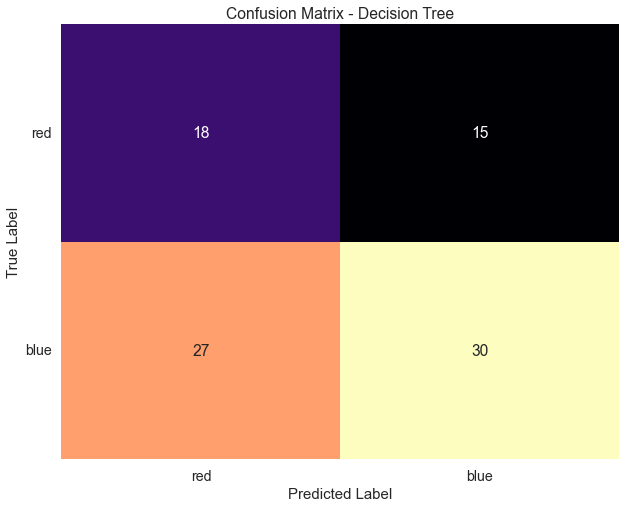

In [35]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)


# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(["red", "blue"])
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(["red", "blue"], rotation=0)
plt.show()

In [36]:
y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.55      0.46        33
           1       0.67      0.53      0.59        57

    accuracy                           0.53        90
   macro avg       0.53      0.54      0.52        90
weighted avg       0.57      0.53      0.54        90

